<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9959987	total: 61.8ms	remaining: 1m 1s
1:	learn: 0.9761920	total: 64.7ms	remaining: 32.3s
2:	learn: 0.9548263	total: 67.2ms	remaining: 22.3s
3:	learn: 0.9367305	total: 72.6ms	remaining: 18.1s
4:	learn: 0.9179719	total: 84.9ms	remaining: 16.9s
5:	learn: 0.9001401	total: 87.4ms	remaining: 14.5s
6:	learn: 0.8843771	total: 90.4ms	remaining: 12.8s
7:	learn: 0.8659206	total: 92.8ms	remaining: 11.5s
8:	learn: 0.8502339	total: 95.9ms	remaining: 10.6s
9:	learn: 0.8327513	total: 100ms	remaining: 9.93s
10:	learn: 0.8190150	total: 103ms	remaining: 9.3s
11:	learn: 0.8043739	total: 106ms	remaining: 8.75s
12:	learn: 0.7882915	total: 109ms	remaining: 8.28s
13:	learn: 0.7729992	total: 112ms	remaining: 7.9s
14:	learn: 0.7607502	total: 115ms	remaining: 7.53s
15:	learn: 0.7451337	total: 117ms	remaining: 7.22s
16:	learn: 0.7333940	total: 120ms	remaining: 6.96s
17:	learn: 0.7195822	total: 125ms	remaining: 6.8s
18:	learn: 0.7071602	total: 127ms	remaining: 6.56s
19:	le

29:	learn: 0.5961478	total: 172ms	remaining: 5.55s
30:	learn: 0.5864587	total: 175ms	remaining: 5.47s
31:	learn: 0.5777649	total: 177ms	remaining: 5.36s
32:	learn: 0.5711903	total: 180ms	remaining: 5.27s
33:	learn: 0.5633476	total: 182ms	remaining: 5.17s
34:	learn: 0.5553722	total: 185ms	remaining: 5.11s
35:	learn: 0.5479393	total: 189ms	remaining: 5.05s
36:	learn: 0.5416615	total: 191ms	remaining: 4.97s
37:	learn: 0.5345882	total: 194ms	remaining: 4.9s
38:	learn: 0.5270479	total: 204ms	remaining: 5.02s
39:	learn: 0.5197140	total: 206ms	remaining: 4.95s
40:	learn: 0.5140227	total: 209ms	remaining: 4.88s
41:	learn: 0.5080719	total: 211ms	remaining: 4.82s
42:	learn: 0.5036368	total: 214ms	remaining: 4.76s
43:	learn: 0.4980955	total: 217ms	remaining: 4.71s
44:	learn: 0.4922013	total: 220ms	remaining: 4.66s
45:	learn: 0.4858081	total: 222ms	remaining: 4.61s
46:	learn: 0.4799246	total: 229ms	remaining: 4.63s
47:	learn: 0.4738706	total: 231ms	remaining: 4.58s
48:	learn: 0.4688934	total: 244m

78:	learn: 0.3538365	total: 321ms	remaining: 3.74s
79:	learn: 0.3516338	total: 327ms	remaining: 3.76s
80:	learn: 0.3494250	total: 330ms	remaining: 3.74s
81:	learn: 0.3473318	total: 332ms	remaining: 3.72s
82:	learn: 0.3454150	total: 335ms	remaining: 3.7s
83:	learn: 0.3430056	total: 350ms	remaining: 3.82s
84:	learn: 0.3410095	total: 353ms	remaining: 3.79s
85:	learn: 0.3381971	total: 355ms	remaining: 3.77s
86:	learn: 0.3360876	total: 357ms	remaining: 3.75s
87:	learn: 0.3330209	total: 360ms	remaining: 3.73s
88:	learn: 0.3304549	total: 363ms	remaining: 3.71s
89:	learn: 0.3276639	total: 365ms	remaining: 3.69s
90:	learn: 0.3256995	total: 378ms	remaining: 3.78s
91:	learn: 0.3238848	total: 381ms	remaining: 3.76s
92:	learn: 0.3222623	total: 384ms	remaining: 3.74s
93:	learn: 0.3201918	total: 386ms	remaining: 3.72s
94:	learn: 0.3181413	total: 389ms	remaining: 3.71s
95:	learn: 0.3168098	total: 391ms	remaining: 3.68s
96:	learn: 0.3153963	total: 394ms	remaining: 3.66s
97:	learn: 0.3136140	total: 396m

126:	learn: 0.2715846	total: 495ms	remaining: 3.4s
127:	learn: 0.2704000	total: 497ms	remaining: 3.39s
128:	learn: 0.2693206	total: 500ms	remaining: 3.37s
129:	learn: 0.2683137	total: 503ms	remaining: 3.37s
130:	learn: 0.2676206	total: 511ms	remaining: 3.39s
131:	learn: 0.2663303	total: 517ms	remaining: 3.4s
132:	learn: 0.2653661	total: 523ms	remaining: 3.41s
133:	learn: 0.2643615	total: 525ms	remaining: 3.39s
134:	learn: 0.2631176	total: 527ms	remaining: 3.38s
135:	learn: 0.2622304	total: 530ms	remaining: 3.37s
136:	learn: 0.2616134	total: 533ms	remaining: 3.35s
137:	learn: 0.2605131	total: 542ms	remaining: 3.38s
138:	learn: 0.2595193	total: 545ms	remaining: 3.37s
139:	learn: 0.2589884	total: 548ms	remaining: 3.36s
140:	learn: 0.2581132	total: 550ms	remaining: 3.35s
141:	learn: 0.2570848	total: 552ms	remaining: 3.34s
142:	learn: 0.2562293	total: 555ms	remaining: 3.33s
143:	learn: 0.2551671	total: 558ms	remaining: 3.31s
144:	learn: 0.2543481	total: 560ms	remaining: 3.3s
145:	learn: 0.2

157:	learn: 0.2438543	total: 620ms	remaining: 3.31s
158:	learn: 0.2430052	total: 624ms	remaining: 3.3s
159:	learn: 0.2422778	total: 627ms	remaining: 3.29s
160:	learn: 0.2414852	total: 642ms	remaining: 3.35s
161:	learn: 0.2407861	total: 646ms	remaining: 3.34s
162:	learn: 0.2400972	total: 648ms	remaining: 3.33s
163:	learn: 0.2392610	total: 651ms	remaining: 3.32s
164:	learn: 0.2385918	total: 654ms	remaining: 3.31s
165:	learn: 0.2379620	total: 656ms	remaining: 3.29s
166:	learn: 0.2372101	total: 659ms	remaining: 3.29s
167:	learn: 0.2363648	total: 662ms	remaining: 3.28s
168:	learn: 0.2357702	total: 664ms	remaining: 3.27s
169:	learn: 0.2351517	total: 667ms	remaining: 3.25s
170:	learn: 0.2340332	total: 678ms	remaining: 3.29s
171:	learn: 0.2334497	total: 691ms	remaining: 3.33s
172:	learn: 0.2328341	total: 694ms	remaining: 3.32s
173:	learn: 0.2321932	total: 696ms	remaining: 3.3s
174:	learn: 0.2313985	total: 699ms	remaining: 3.29s
175:	learn: 0.2307555	total: 702ms	remaining: 3.29s
176:	learn: 0.

193:	learn: 0.2192227	total: 767ms	remaining: 3.19s
194:	learn: 0.2186988	total: 776ms	remaining: 3.2s
195:	learn: 0.2183170	total: 779ms	remaining: 3.19s
196:	learn: 0.2179957	total: 781ms	remaining: 3.19s
197:	learn: 0.2174933	total: 784ms	remaining: 3.17s
198:	learn: 0.2170914	total: 786ms	remaining: 3.16s
199:	learn: 0.2166107	total: 789ms	remaining: 3.15s
200:	learn: 0.2158613	total: 791ms	remaining: 3.14s
201:	learn: 0.2152862	total: 794ms	remaining: 3.13s
202:	learn: 0.2142813	total: 796ms	remaining: 3.13s
203:	learn: 0.2138577	total: 799ms	remaining: 3.12s
204:	learn: 0.2133457	total: 802ms	remaining: 3.11s
205:	learn: 0.2129114	total: 806ms	remaining: 3.11s
206:	learn: 0.2123131	total: 810ms	remaining: 3.1s
207:	learn: 0.2119317	total: 813ms	remaining: 3.1s
208:	learn: 0.2113237	total: 816ms	remaining: 3.09s
209:	learn: 0.2107943	total: 818ms	remaining: 3.08s
210:	learn: 0.2099772	total: 824ms	remaining: 3.08s
211:	learn: 0.2093417	total: 827ms	remaining: 3.08s
212:	learn: 0.2

234:	learn: 0.1962259	total: 915ms	remaining: 2.98s
235:	learn: 0.1955152	total: 918ms	remaining: 2.97s
236:	learn: 0.1951172	total: 920ms	remaining: 2.96s
237:	learn: 0.1943177	total: 923ms	remaining: 2.96s
238:	learn: 0.1938434	total: 926ms	remaining: 2.95s
239:	learn: 0.1936102	total: 929ms	remaining: 2.94s
240:	learn: 0.1933751	total: 931ms	remaining: 2.93s
241:	learn: 0.1928069	total: 934ms	remaining: 2.92s
242:	learn: 0.1925577	total: 936ms	remaining: 2.92s
243:	learn: 0.1920540	total: 939ms	remaining: 2.91s
244:	learn: 0.1917358	total: 942ms	remaining: 2.9s
245:	learn: 0.1912836	total: 945ms	remaining: 2.9s
246:	learn: 0.1907203	total: 953ms	remaining: 2.9s
247:	learn: 0.1903503	total: 956ms	remaining: 2.9s
248:	learn: 0.1897571	total: 959ms	remaining: 2.89s
249:	learn: 0.1895358	total: 962ms	remaining: 2.88s
250:	learn: 0.1889759	total: 964ms	remaining: 2.88s
251:	learn: 0.1884000	total: 967ms	remaining: 2.87s
252:	learn: 0.1877878	total: 969ms	remaining: 2.86s
253:	learn: 0.18

287:	learn: 0.1722629	total: 1.08s	remaining: 2.68s
288:	learn: 0.1716782	total: 1.09s	remaining: 2.67s
289:	learn: 0.1714493	total: 1.09s	remaining: 2.67s
290:	learn: 0.1711298	total: 1.09s	remaining: 2.66s
291:	learn: 0.1709713	total: 1.09s	remaining: 2.65s
292:	learn: 0.1705824	total: 1.1s	remaining: 2.65s
293:	learn: 0.1701915	total: 1.1s	remaining: 2.64s
294:	learn: 0.1696768	total: 1.1s	remaining: 2.63s
295:	learn: 0.1691514	total: 1.1s	remaining: 2.63s
296:	learn: 0.1686773	total: 1.11s	remaining: 2.62s
297:	learn: 0.1684669	total: 1.11s	remaining: 2.62s
298:	learn: 0.1679855	total: 1.11s	remaining: 2.61s
299:	learn: 0.1674511	total: 1.13s	remaining: 2.63s
300:	learn: 0.1671079	total: 1.13s	remaining: 2.63s
301:	learn: 0.1665726	total: 1.13s	remaining: 2.62s
302:	learn: 0.1660185	total: 1.14s	remaining: 2.61s
303:	learn: 0.1656891	total: 1.14s	remaining: 2.6s
304:	learn: 0.1653741	total: 1.14s	remaining: 2.6s
305:	learn: 0.1650580	total: 1.14s	remaining: 2.59s
306:	learn: 0.1646

333:	learn: 0.1554907	total: 1.25s	remaining: 2.5s
334:	learn: 0.1551192	total: 1.25s	remaining: 2.49s
335:	learn: 0.1548327	total: 1.26s	remaining: 2.48s
336:	learn: 0.1544759	total: 1.26s	remaining: 2.48s
337:	learn: 0.1541224	total: 1.26s	remaining: 2.47s
338:	learn: 0.1537916	total: 1.26s	remaining: 2.46s
339:	learn: 0.1535784	total: 1.26s	remaining: 2.46s
340:	learn: 0.1532874	total: 1.27s	remaining: 2.45s
341:	learn: 0.1528936	total: 1.27s	remaining: 2.44s
342:	learn: 0.1525949	total: 1.27s	remaining: 2.44s
343:	learn: 0.1522668	total: 1.28s	remaining: 2.43s
344:	learn: 0.1519765	total: 1.28s	remaining: 2.43s
345:	learn: 0.1517307	total: 1.28s	remaining: 2.42s
346:	learn: 0.1512564	total: 1.28s	remaining: 2.42s
347:	learn: 0.1510329	total: 1.29s	remaining: 2.41s
348:	learn: 0.1507367	total: 1.29s	remaining: 2.4s
349:	learn: 0.1504277	total: 1.29s	remaining: 2.4s
350:	learn: 0.1500393	total: 1.29s	remaining: 2.39s
351:	learn: 0.1496316	total: 1.3s	remaining: 2.39s
352:	learn: 0.14

401:	learn: 0.1373233	total: 1.42s	remaining: 2.12s
402:	learn: 0.1372560	total: 1.43s	remaining: 2.11s
403:	learn: 0.1369034	total: 1.43s	remaining: 2.11s
404:	learn: 0.1367012	total: 1.43s	remaining: 2.1s
405:	learn: 0.1365198	total: 1.43s	remaining: 2.1s
406:	learn: 0.1362497	total: 1.44s	remaining: 2.09s
407:	learn: 0.1361811	total: 1.44s	remaining: 2.09s
408:	learn: 0.1359469	total: 1.44s	remaining: 2.08s
409:	learn: 0.1357542	total: 1.44s	remaining: 2.08s
410:	learn: 0.1354804	total: 1.45s	remaining: 2.07s
411:	learn: 0.1352069	total: 1.45s	remaining: 2.07s
412:	learn: 0.1350452	total: 1.45s	remaining: 2.06s
413:	learn: 0.1347133	total: 1.46s	remaining: 2.06s
414:	learn: 0.1343751	total: 1.46s	remaining: 2.06s
415:	learn: 0.1340142	total: 1.46s	remaining: 2.05s
416:	learn: 0.1337156	total: 1.46s	remaining: 2.04s
417:	learn: 0.1333886	total: 1.47s	remaining: 2.04s
418:	learn: 0.1332619	total: 1.47s	remaining: 2.04s
419:	learn: 0.1330076	total: 1.47s	remaining: 2.03s
420:	learn: 0.

456:	learn: 0.1248691	total: 1.58s	remaining: 1.88s
457:	learn: 0.1246839	total: 1.58s	remaining: 1.88s
458:	learn: 0.1244384	total: 1.59s	remaining: 1.87s
459:	learn: 0.1242865	total: 1.59s	remaining: 1.87s
460:	learn: 0.1239589	total: 1.59s	remaining: 1.86s
461:	learn: 0.1237346	total: 1.6s	remaining: 1.86s
462:	learn: 0.1233383	total: 1.6s	remaining: 1.86s
463:	learn: 0.1231692	total: 1.61s	remaining: 1.86s
464:	learn: 0.1229549	total: 1.61s	remaining: 1.85s
465:	learn: 0.1228899	total: 1.61s	remaining: 1.85s
466:	learn: 0.1227446	total: 1.61s	remaining: 1.84s
467:	learn: 0.1226840	total: 1.62s	remaining: 1.84s
468:	learn: 0.1224971	total: 1.62s	remaining: 1.83s
469:	learn: 0.1222123	total: 1.62s	remaining: 1.83s
470:	learn: 0.1221318	total: 1.63s	remaining: 1.82s
471:	learn: 0.1220603	total: 1.63s	remaining: 1.82s
472:	learn: 0.1217765	total: 1.63s	remaining: 1.82s
473:	learn: 0.1214470	total: 1.64s	remaining: 1.82s
474:	learn: 0.1212476	total: 1.65s	remaining: 1.82s
475:	learn: 0.

505:	learn: 0.1150769	total: 1.74s	remaining: 1.7s
506:	learn: 0.1148858	total: 1.75s	remaining: 1.7s
507:	learn: 0.1146768	total: 1.75s	remaining: 1.69s
508:	learn: 0.1144601	total: 1.75s	remaining: 1.69s
509:	learn: 0.1142768	total: 1.76s	remaining: 1.69s
510:	learn: 0.1140781	total: 1.76s	remaining: 1.68s
511:	learn: 0.1138184	total: 1.76s	remaining: 1.68s
512:	learn: 0.1135804	total: 1.76s	remaining: 1.68s
513:	learn: 0.1134281	total: 1.77s	remaining: 1.67s
514:	learn: 0.1131681	total: 1.77s	remaining: 1.67s
515:	learn: 0.1130453	total: 1.77s	remaining: 1.67s
516:	learn: 0.1128946	total: 1.78s	remaining: 1.66s
517:	learn: 0.1126315	total: 1.78s	remaining: 1.66s
518:	learn: 0.1124949	total: 1.78s	remaining: 1.65s
519:	learn: 0.1122151	total: 1.78s	remaining: 1.65s
520:	learn: 0.1119754	total: 1.79s	remaining: 1.64s
521:	learn: 0.1116994	total: 1.79s	remaining: 1.64s
522:	learn: 0.1115735	total: 1.79s	remaining: 1.64s
523:	learn: 0.1113466	total: 1.8s	remaining: 1.63s
524:	learn: 0.1

550:	learn: 0.1060984	total: 1.87s	remaining: 1.52s
551:	learn: 0.1058855	total: 1.87s	remaining: 1.52s
552:	learn: 0.1056663	total: 1.88s	remaining: 1.52s
553:	learn: 0.1056267	total: 1.88s	remaining: 1.51s
554:	learn: 0.1055032	total: 1.88s	remaining: 1.51s
555:	learn: 0.1052744	total: 1.89s	remaining: 1.51s
556:	learn: 0.1052086	total: 1.89s	remaining: 1.5s
557:	learn: 0.1051810	total: 1.89s	remaining: 1.5s
558:	learn: 0.1051174	total: 1.9s	remaining: 1.5s
559:	learn: 0.1050832	total: 1.9s	remaining: 1.49s
560:	learn: 0.1048725	total: 1.9s	remaining: 1.49s
561:	learn: 0.1046729	total: 1.9s	remaining: 1.48s
562:	learn: 0.1043391	total: 1.91s	remaining: 1.48s
563:	learn: 0.1042886	total: 1.91s	remaining: 1.48s
564:	learn: 0.1040043	total: 1.91s	remaining: 1.47s
565:	learn: 0.1038783	total: 1.91s	remaining: 1.47s
566:	learn: 0.1036734	total: 1.92s	remaining: 1.46s
567:	learn: 0.1035135	total: 1.92s	remaining: 1.46s
568:	learn: 0.1033131	total: 1.92s	remaining: 1.46s
569:	learn: 0.10307

613:	learn: 0.0964060	total: 2.05s	remaining: 1.29s
614:	learn: 0.0962836	total: 2.05s	remaining: 1.28s
615:	learn: 0.0962408	total: 2.06s	remaining: 1.28s
616:	learn: 0.0961077	total: 2.06s	remaining: 1.28s
617:	learn: 0.0960936	total: 2.06s	remaining: 1.28s
618:	learn: 0.0960665	total: 2.07s	remaining: 1.27s
619:	learn: 0.0959546	total: 2.07s	remaining: 1.27s
620:	learn: 0.0958613	total: 2.07s	remaining: 1.26s
621:	learn: 0.0956651	total: 2.08s	remaining: 1.26s
622:	learn: 0.0954791	total: 2.08s	remaining: 1.26s
623:	learn: 0.0952915	total: 2.08s	remaining: 1.25s
624:	learn: 0.0951956	total: 2.08s	remaining: 1.25s
625:	learn: 0.0950527	total: 2.09s	remaining: 1.25s
626:	learn: 0.0948945	total: 2.09s	remaining: 1.24s
627:	learn: 0.0947618	total: 2.09s	remaining: 1.24s
628:	learn: 0.0945708	total: 2.09s	remaining: 1.23s
629:	learn: 0.0944050	total: 2.1s	remaining: 1.23s
630:	learn: 0.0941959	total: 2.1s	remaining: 1.23s
631:	learn: 0.0941667	total: 2.1s	remaining: 1.22s
632:	learn: 0.0

676:	learn: 0.0883080	total: 2.22s	remaining: 1.06s
677:	learn: 0.0881727	total: 2.22s	remaining: 1.05s
678:	learn: 0.0880318	total: 2.22s	remaining: 1.05s
679:	learn: 0.0878901	total: 2.23s	remaining: 1.05s
680:	learn: 0.0877652	total: 2.24s	remaining: 1.05s
681:	learn: 0.0876222	total: 2.24s	remaining: 1.04s
682:	learn: 0.0875037	total: 2.25s	remaining: 1.04s
683:	learn: 0.0874157	total: 2.25s	remaining: 1.04s
684:	learn: 0.0873714	total: 2.25s	remaining: 1.03s
685:	learn: 0.0872729	total: 2.25s	remaining: 1.03s
686:	learn: 0.0871506	total: 2.25s	remaining: 1.03s
687:	learn: 0.0871216	total: 2.26s	remaining: 1.02s
688:	learn: 0.0870868	total: 2.26s	remaining: 1.02s
689:	learn: 0.0869610	total: 2.26s	remaining: 1.02s
690:	learn: 0.0868184	total: 2.26s	remaining: 1.01s
691:	learn: 0.0867411	total: 2.27s	remaining: 1.01s
692:	learn: 0.0865465	total: 2.27s	remaining: 1s
693:	learn: 0.0864784	total: 2.27s	remaining: 1s
694:	learn: 0.0863438	total: 2.27s	remaining: 998ms
695:	learn: 0.0861

730:	learn: 0.0819370	total: 2.39s	remaining: 880ms
731:	learn: 0.0818634	total: 2.39s	remaining: 876ms
732:	learn: 0.0817281	total: 2.4s	remaining: 873ms
733:	learn: 0.0817077	total: 2.4s	remaining: 870ms
734:	learn: 0.0816018	total: 2.41s	remaining: 868ms
735:	learn: 0.0813760	total: 2.41s	remaining: 865ms
736:	learn: 0.0812539	total: 2.42s	remaining: 862ms
737:	learn: 0.0811341	total: 2.42s	remaining: 859ms
738:	learn: 0.0811039	total: 2.42s	remaining: 856ms
739:	learn: 0.0810277	total: 2.43s	remaining: 855ms
740:	learn: 0.0808908	total: 2.44s	remaining: 851ms
741:	learn: 0.0807072	total: 2.44s	remaining: 848ms
742:	learn: 0.0805712	total: 2.45s	remaining: 847ms
743:	learn: 0.0804634	total: 2.45s	remaining: 843ms
744:	learn: 0.0803189	total: 2.45s	remaining: 840ms
745:	learn: 0.0801832	total: 2.46s	remaining: 836ms
746:	learn: 0.0801366	total: 2.46s	remaining: 833ms
747:	learn: 0.0800527	total: 2.46s	remaining: 829ms
748:	learn: 0.0798735	total: 2.46s	remaining: 826ms
749:	learn: 0.

779:	learn: 0.0763647	total: 2.56s	remaining: 721ms
780:	learn: 0.0762384	total: 2.56s	remaining: 718ms
781:	learn: 0.0760946	total: 2.56s	remaining: 714ms
782:	learn: 0.0759573	total: 2.56s	remaining: 711ms
783:	learn: 0.0758217	total: 2.57s	remaining: 707ms
784:	learn: 0.0757103	total: 2.57s	remaining: 704ms
785:	learn: 0.0755629	total: 2.57s	remaining: 701ms
786:	learn: 0.0754457	total: 2.58s	remaining: 697ms
787:	learn: 0.0752896	total: 2.58s	remaining: 694ms
788:	learn: 0.0751891	total: 2.58s	remaining: 690ms
789:	learn: 0.0750760	total: 2.58s	remaining: 687ms
790:	learn: 0.0749859	total: 2.58s	remaining: 683ms
791:	learn: 0.0748276	total: 2.59s	remaining: 680ms
792:	learn: 0.0747404	total: 2.59s	remaining: 676ms
793:	learn: 0.0746717	total: 2.6s	remaining: 673ms
794:	learn: 0.0746355	total: 2.6s	remaining: 670ms
795:	learn: 0.0745445	total: 2.6s	remaining: 667ms
796:	learn: 0.0744519	total: 2.6s	remaining: 663ms
797:	learn: 0.0743084	total: 2.61s	remaining: 660ms
798:	learn: 0.07

846:	learn: 0.0693419	total: 2.73s	remaining: 493ms
847:	learn: 0.0691764	total: 2.73s	remaining: 490ms
848:	learn: 0.0690416	total: 2.74s	remaining: 487ms
849:	learn: 0.0689693	total: 2.74s	remaining: 483ms
850:	learn: 0.0688447	total: 2.74s	remaining: 480ms
851:	learn: 0.0687225	total: 2.74s	remaining: 477ms
852:	learn: 0.0686696	total: 2.75s	remaining: 473ms
853:	learn: 0.0684977	total: 2.75s	remaining: 470ms
854:	learn: 0.0683159	total: 2.75s	remaining: 467ms
855:	learn: 0.0682417	total: 2.75s	remaining: 463ms
856:	learn: 0.0681734	total: 2.76s	remaining: 460ms
857:	learn: 0.0680771	total: 2.76s	remaining: 457ms
858:	learn: 0.0680319	total: 2.76s	remaining: 453ms
859:	learn: 0.0679444	total: 2.76s	remaining: 450ms
860:	learn: 0.0678404	total: 2.77s	remaining: 447ms
861:	learn: 0.0677273	total: 2.77s	remaining: 443ms
862:	learn: 0.0676232	total: 2.77s	remaining: 440ms
863:	learn: 0.0675220	total: 2.77s	remaining: 437ms
864:	learn: 0.0674181	total: 2.78s	remaining: 433ms
865:	learn: 

914:	learn: 0.0632194	total: 2.91s	remaining: 270ms
915:	learn: 0.0631477	total: 2.91s	remaining: 267ms
916:	learn: 0.0631265	total: 2.91s	remaining: 264ms
917:	learn: 0.0630479	total: 2.92s	remaining: 261ms
918:	learn: 0.0629524	total: 2.92s	remaining: 257ms
919:	learn: 0.0628500	total: 2.92s	remaining: 254ms
920:	learn: 0.0627325	total: 2.92s	remaining: 251ms
921:	learn: 0.0626323	total: 2.92s	remaining: 248ms
922:	learn: 0.0626091	total: 2.93s	remaining: 244ms
923:	learn: 0.0625413	total: 2.93s	remaining: 241ms
924:	learn: 0.0625186	total: 2.93s	remaining: 238ms
925:	learn: 0.0624564	total: 2.94s	remaining: 235ms
926:	learn: 0.0623824	total: 2.94s	remaining: 231ms
927:	learn: 0.0623166	total: 2.94s	remaining: 228ms
928:	learn: 0.0621766	total: 2.94s	remaining: 225ms
929:	learn: 0.0620607	total: 2.95s	remaining: 222ms
930:	learn: 0.0619613	total: 2.95s	remaining: 219ms
931:	learn: 0.0618960	total: 2.95s	remaining: 215ms
932:	learn: 0.0618141	total: 2.95s	remaining: 212ms
933:	learn: 

983:	learn: 0.0582097	total: 3.08s	remaining: 50.1ms
984:	learn: 0.0581383	total: 3.08s	remaining: 47ms
985:	learn: 0.0581102	total: 3.09s	remaining: 43.8ms
986:	learn: 0.0580589	total: 3.09s	remaining: 40.7ms
987:	learn: 0.0579910	total: 3.09s	remaining: 37.6ms
988:	learn: 0.0579682	total: 3.1s	remaining: 34.4ms
989:	learn: 0.0578596	total: 3.1s	remaining: 31.3ms
990:	learn: 0.0577317	total: 3.1s	remaining: 28.2ms
991:	learn: 0.0576427	total: 3.1s	remaining: 25ms
992:	learn: 0.0575816	total: 3.1s	remaining: 21.9ms
993:	learn: 0.0575090	total: 3.11s	remaining: 18.8ms
994:	learn: 0.0574256	total: 3.11s	remaining: 15.6ms
995:	learn: 0.0573493	total: 3.11s	remaining: 12.5ms
996:	learn: 0.0572410	total: 3.12s	remaining: 9.38ms
997:	learn: 0.0571656	total: 3.12s	remaining: 6.25ms
998:	learn: 0.0571017	total: 3.12s	remaining: 3.12ms
999:	learn: 0.0569663	total: 3.12s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.22180370197528945
ABC Pre-generator MAE 0.23567245116276567


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

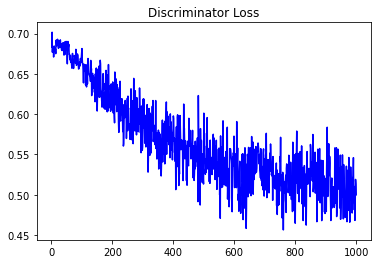

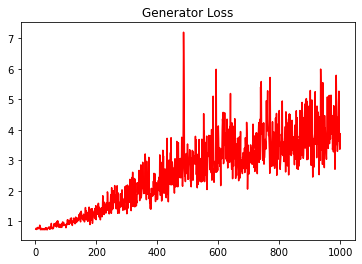

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.23438469497053244


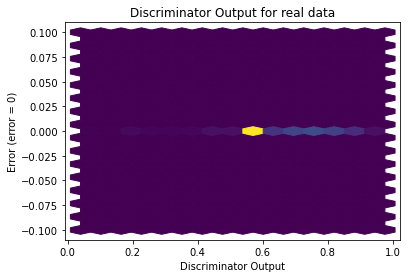

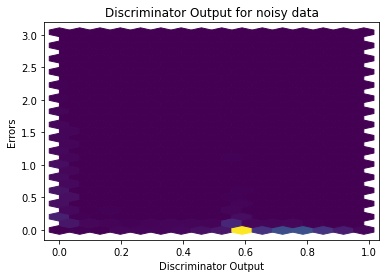

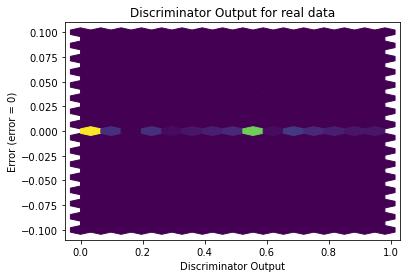

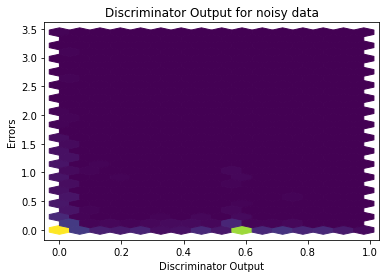

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())